## Weather Forecast

You work as data scientists in a company with high expertise on the development of ML/AI algorithms in various domain. You are requested from your Project Manager to create a weather forecast model. Hence, your aim is to develop a binary classification model to predict whether it will rain or not based on a given dataset for the Australia. You will work with a dataset containing various meteorological features and the corresponding labels indicating whether it rained on a particular day.

You are provided with the below CSV dataset: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

It includes information such as temperature, sunshine, wind speed, evaporation, and other relevant weather features. The target variable is binary, indicating whether there was rainfall on a given day. The dataset is sufficiently large to allow for meaningful training and testing of the classification model. As indicated in the instructions the "RainTomorrow" column is the target variable that you will use for your prediction, meaning if will rain or not the next day. This column is <b>Yes</b> if the rain for that day is 1mm or more.

You are also requested to compare and evaluate <b>two different ML Classification models</b> and present the final results and justifications on your final selection

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import the scikit-learn library and corresponding packages needed for feature scaling
#and the different classifications steps and evaluation metrics of your models

In [2]:
# Load the dataset

weather_df = pd.read_csv('./weatherAUS.csv')

In [3]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Task 1: Assign numerical values to the targets

After downloading the dataset, dissecting it into X and y variables representing the features (X) and the target variable (y) (also referred to as the label/s) respectively, our aim is to convert the values in the <b><i>"RainTomorrow"</i></b> column into binary (0 or 1) values, based on the instructions given in the beggining

In [3]:
# Create the respective steps for the needed transformation of values and the distiquish to X and y dataframes

X = weather_df.drop('RainTomorrow', axis=1, inplace=False)
y = weather_df.iloc[:, -1]

RainTomorrow = []
for idx in y:
    if idx == 'Yes':
        RainTomorrow.append(1)
    else:
        RainTomorrow.append(0)

y = pd.DataFrame({'target': RainTomorrow})


## Task 2: Exploratory Data Analysis (EDA)

In [4]:
# Data Exploration
# Display basic information about the dataset, such as column names, data types, and missing values.
print("Dataset Information:")
print(X.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am

In [5]:
print(X.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')


In [6]:
print(X.dtypes)

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object


In [7]:
X.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
dtype: int64

In [8]:
# Display summary statistics of numerical and categorical features.
print("\nSummary Statistics:")
X.describe()


Summary Statistics:


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

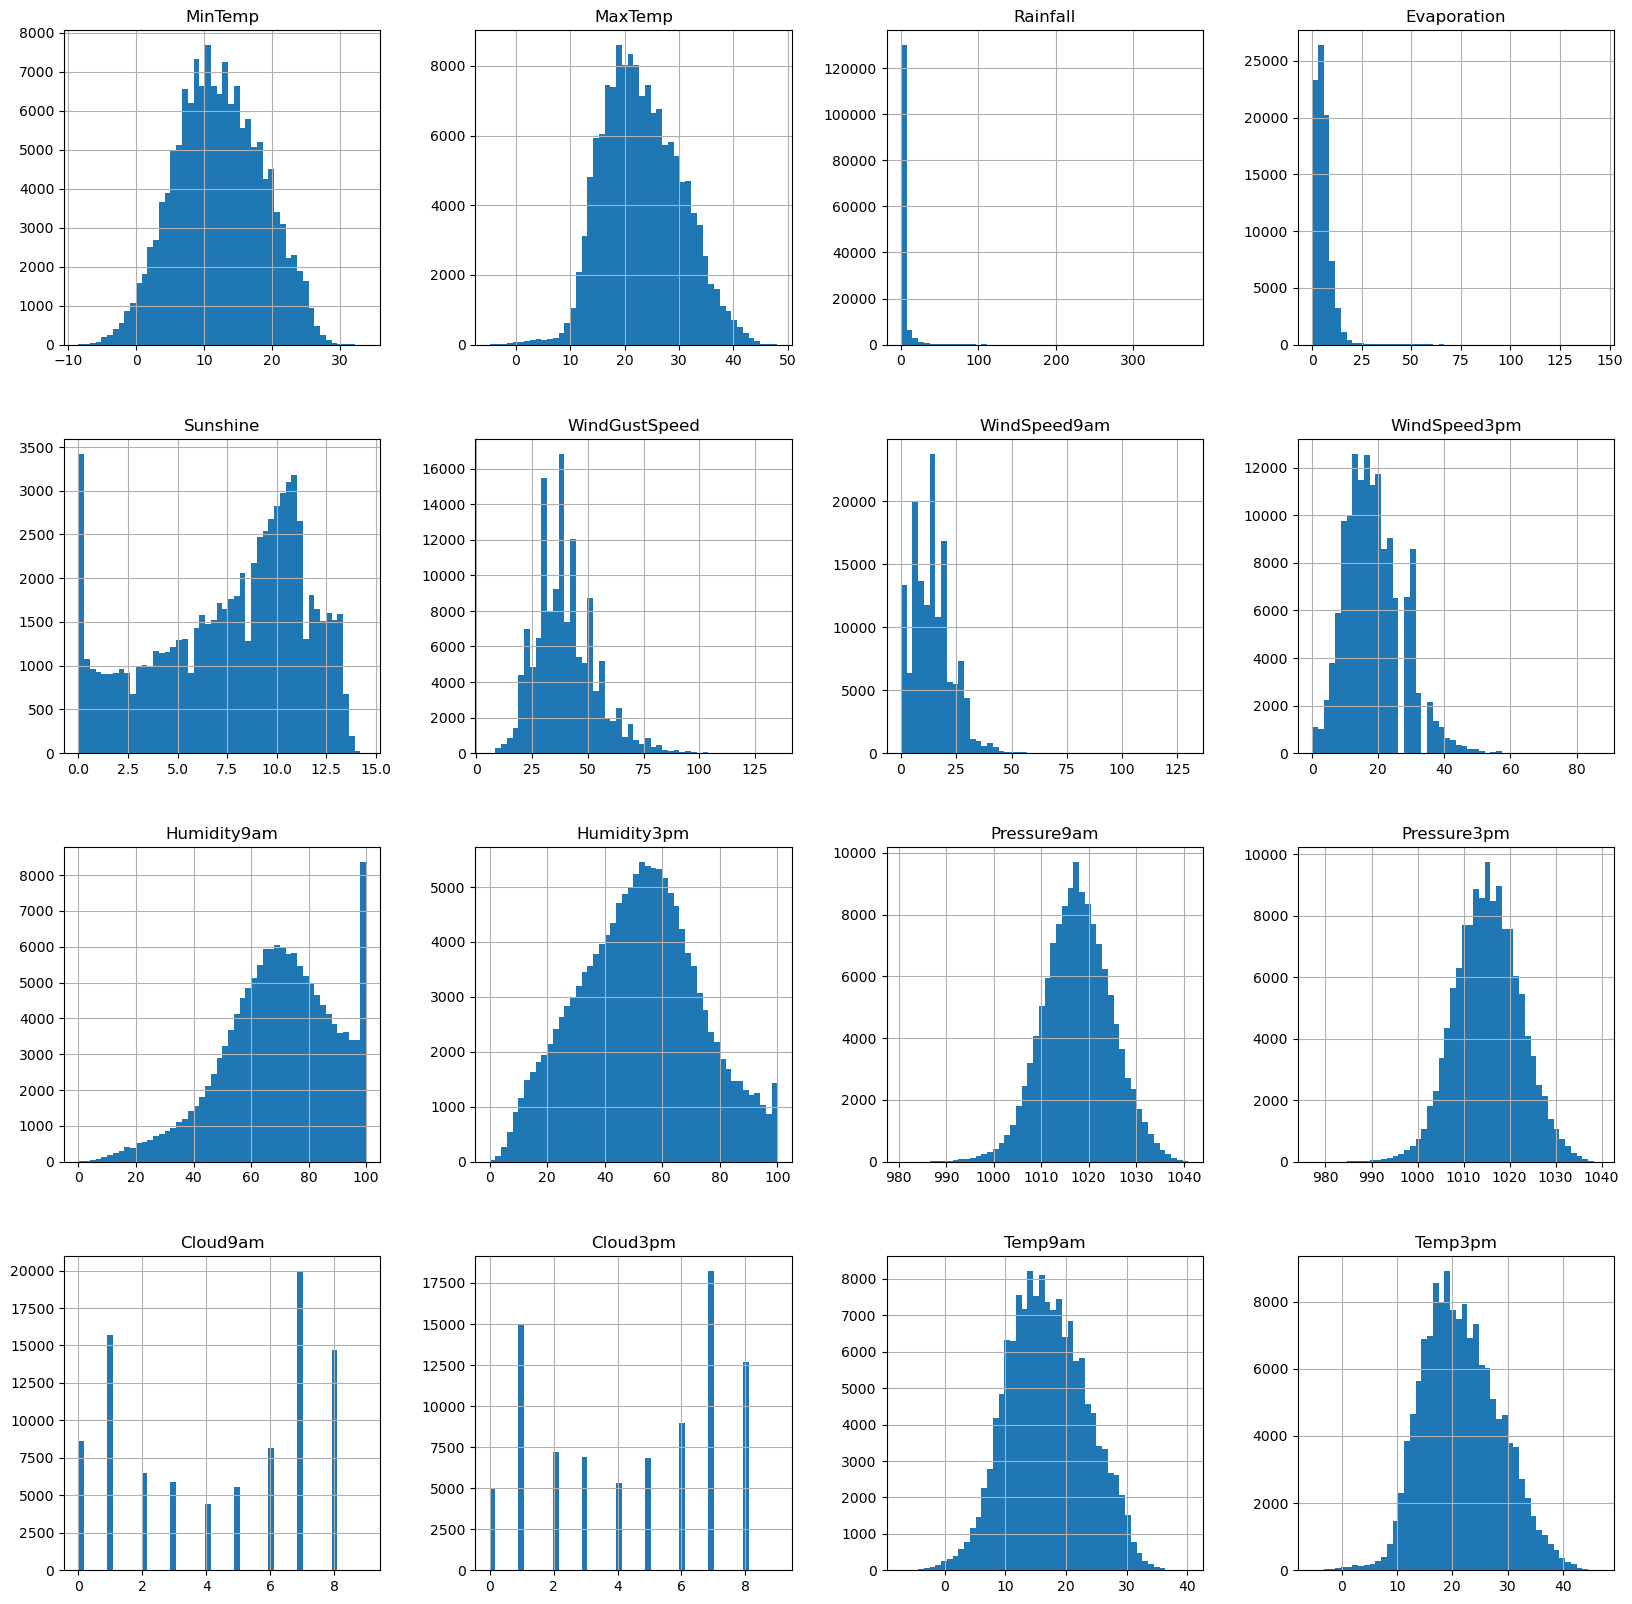

In [9]:
# Visualize the distribution of the target variable and key features.
# Use histograms, boxplots, or other relevant visualizations.

X.hist(bins=50, figsize=(20,20))

<Axes: xlabel='RainToday', ylabel='count'>

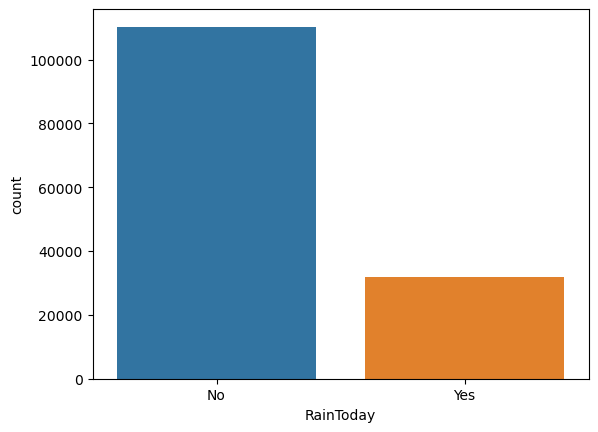

In [10]:
sns.countplot(x='RainToday', data=X)

<Axes: xlabel='target', ylabel='count'>

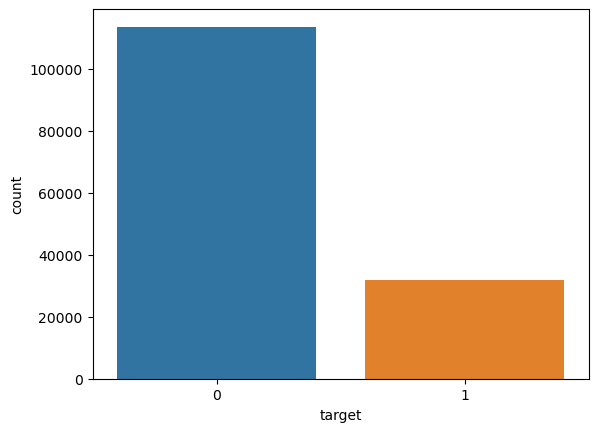

In [11]:
sns.countplot(x=y['target'], data=y)

In [15]:
#Count the classes
#Count the frequency of values corresponding to different categories

for col in X.columns:
    print(X[col].value_counts())
    

Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAA

In [16]:
# Check for missing values and outliers.
# Handle missing values and outliers as necessary.

num_cols = X.dtypes[X.dtypes != 'object'].index.to_list()
cat_cols = X.dtypes[X.dtypes == 'object'].index.to_list()

for num in num_cols:  
    X[num].fillna(X[num].mean(), inplace=True)
    
for cat in cat_cols:  
    X[cat].fillna(X[cat].mode()[0], inplace=True)

X.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

## Task 3: Examine correlations

In [17]:
# After filling in the missing values, now calculate a correlation matrix for the numerical columns (only).

cormat = X[num_cols].corr()
cormat

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.733400,0.102706,0.351321,0.051297,0.172553,0.173404,0.173058,-0.230970,0.005995,-0.423584,-0.433147,0.062151,0.016722,0.897692,0.699211
MaxTemp,0.733400,1.000000,-0.074040,0.438653,0.328931,0.065895,0.014294,0.049717,-0.497927,-0.498760,-0.308309,-0.396622,-0.225315,-0.212760,0.879170,0.968713
Rainfall,0.102706,-0.074040,1.000000,-0.037863,-0.170973,0.126446,0.085925,0.056527,0.221380,0.248905,-0.159055,-0.119541,0.171144,0.145343,0.011069,-0.077684
Evaporation,0.351321,0.438653,-0.037863,1.000000,0.288169,0.147353,0.139968,0.094352,-0.373732,-0.286025,-0.210961,-0.230351,-0.150264,-0.145472,0.414592,0.425573
Sunshine,0.051297,0.328931,-0.170973,0.288169,1.000000,-0.023844,0.003843,0.037836,-0.348855,-0.443121,0.031406,-0.014815,-0.532497,-0.553853,0.208580,0.346685
WindGustSpeed,0.172553,0.065895,0.126446,0.147353,-0.023844,1.000000,0.577319,0.657243,-0.207964,-0.025355,-0.425760,-0.383938,0.052417,0.079927,0.145904,0.031884
WindSpeed9am,0.173404,0.014294,0.085925,0.139968,0.003843,0.577319,1.000000,0.512427,-0.268271,-0.030887,-0.215339,-0.165388,0.019714,0.041667,0.127592,0.004476
WindSpeed3pm,0.173058,0.049717,0.056527,0.094352,0.037836,0.657243,0.512427,1.000000,-0.143458,0.016275,-0.277604,-0.239659,0.041611,0.019813,0.161060,0.027587
Humidity9am,-0.230970,-0.497927,0.221380,-0.373732,-0.348855,-0.207964,-0.268271,-0.143458,1.000000,0.659072,0.131503,0.176009,0.353490,0.273314,-0.469641,-0.490709
Humidity3pm,0.005995,-0.498760,0.248905,-0.286025,-0.443121,-0.025355,-0.030887,0.016275,0.659072,1.000000,-0.025848,0.048695,0.398762,0.406605,-0.216964,-0.555608


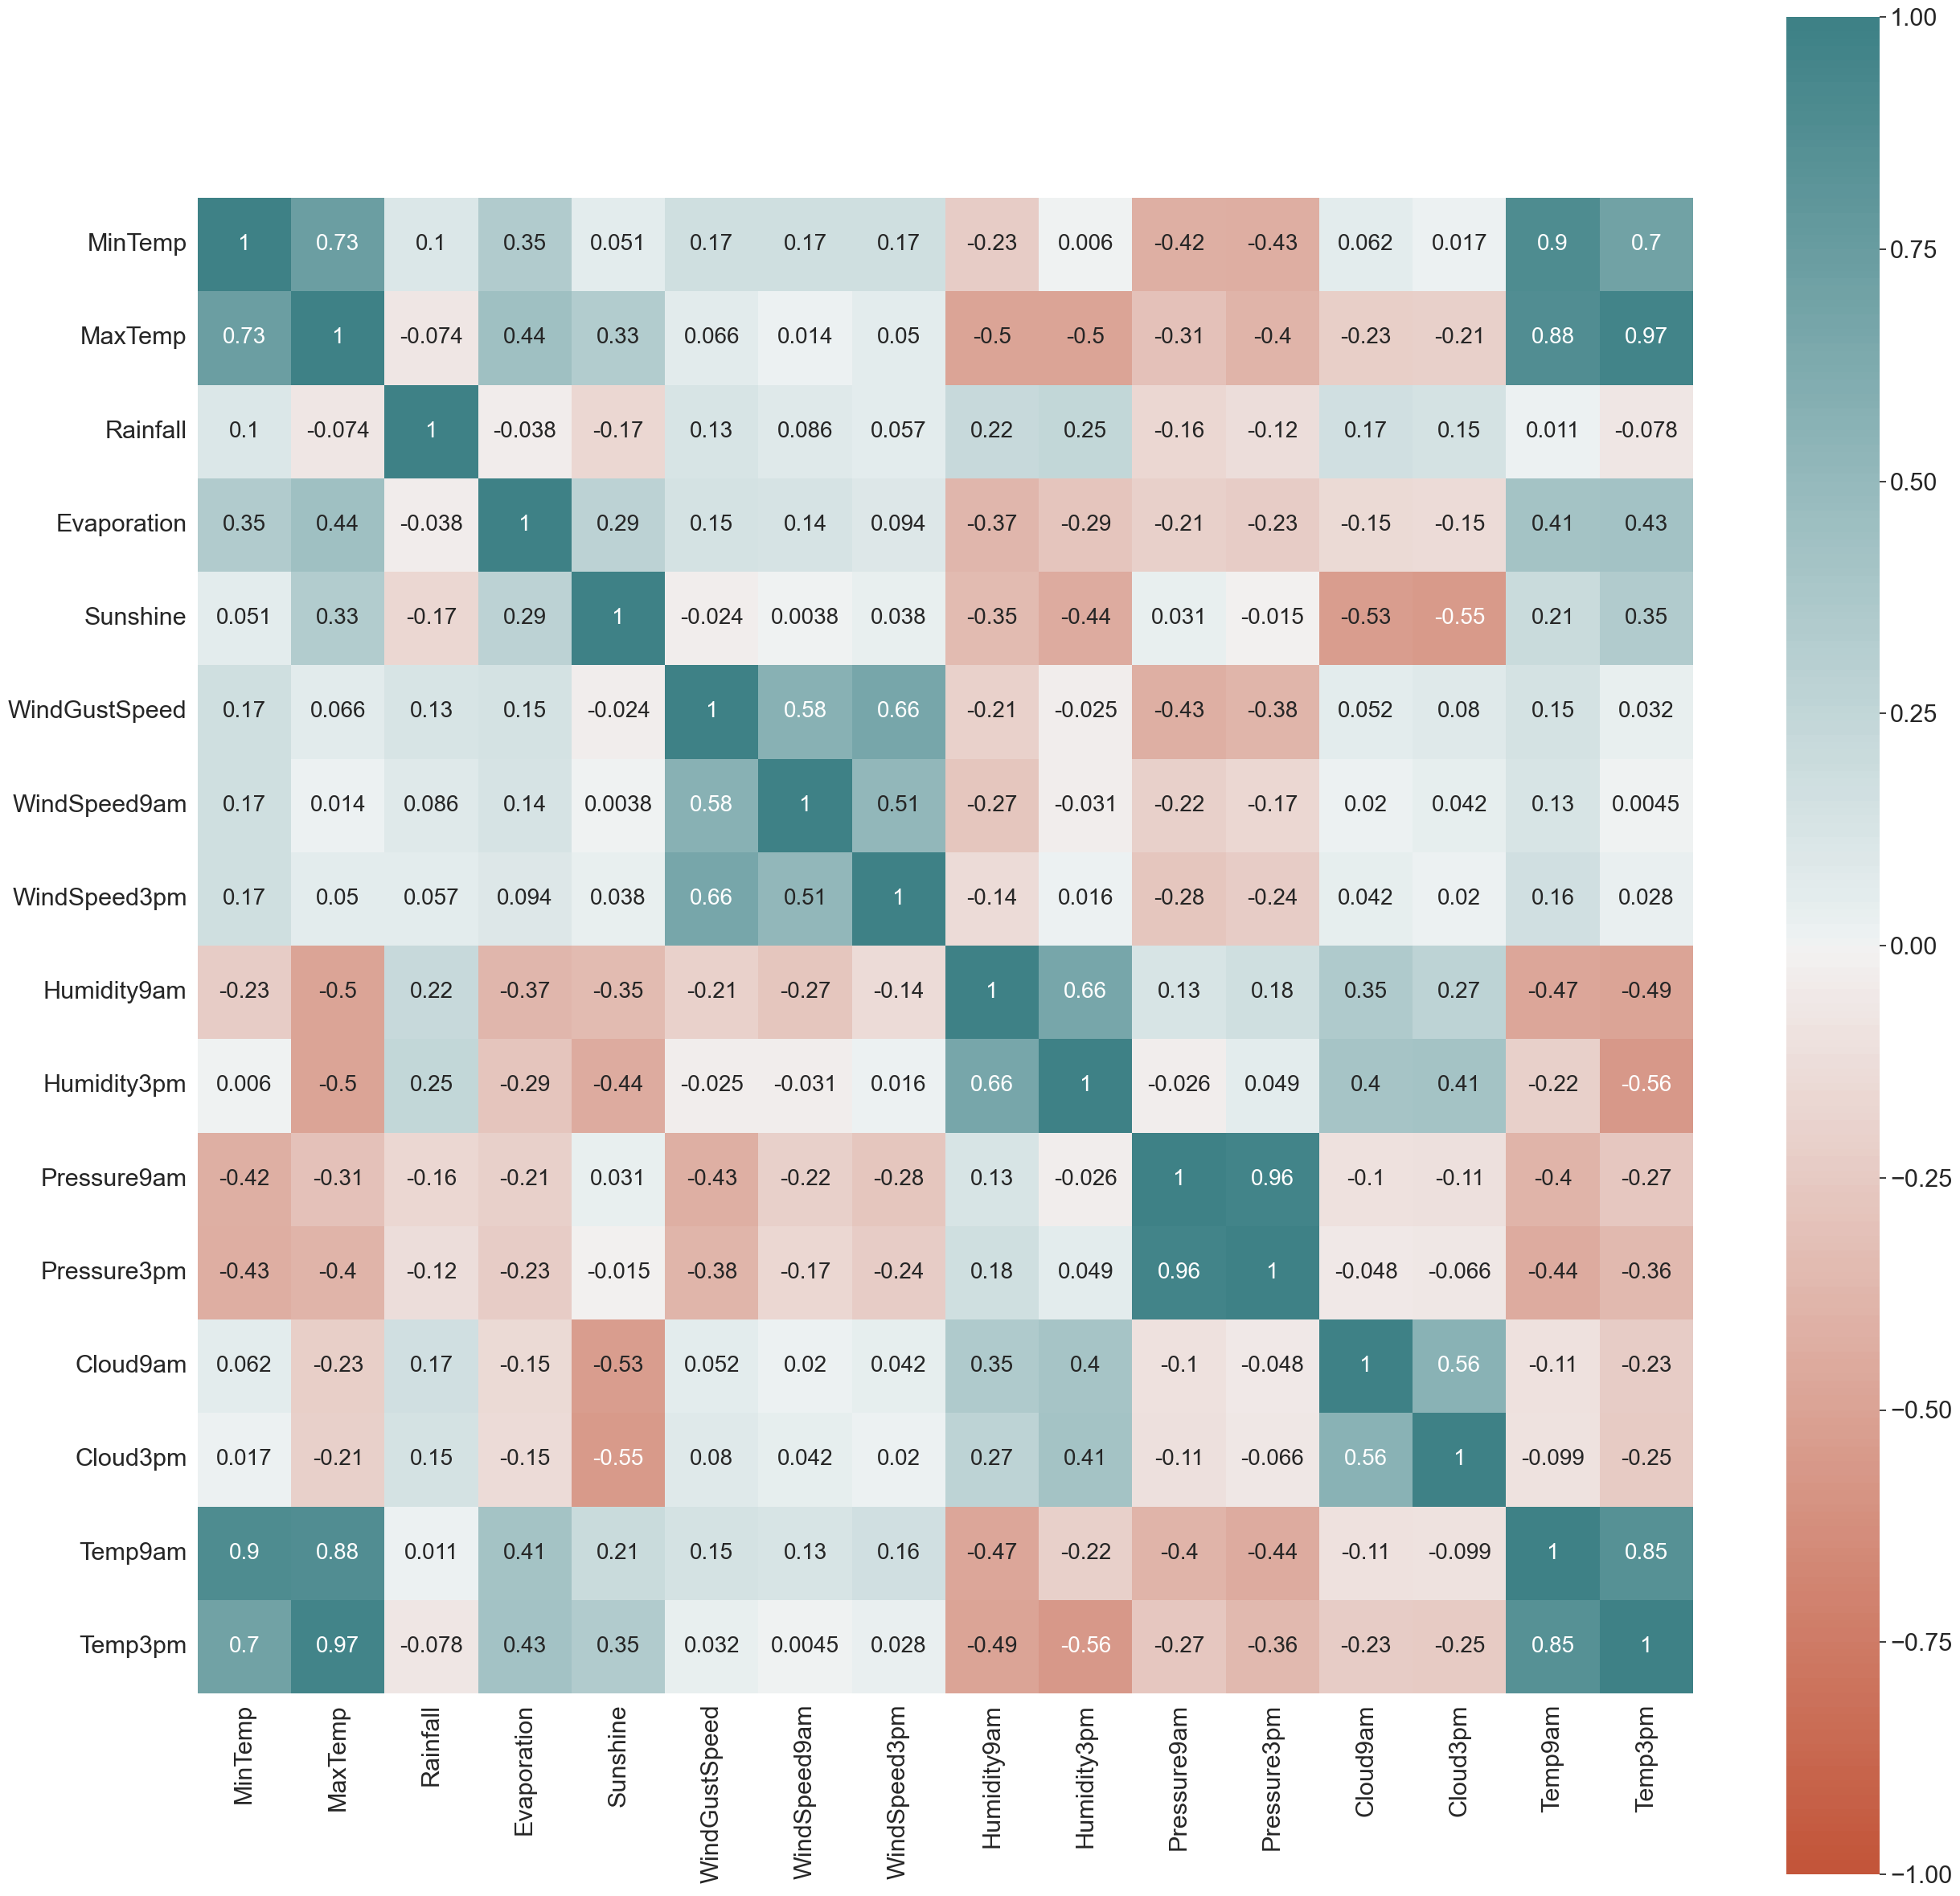

In [18]:
## We shall now plot the corresponding correlation matrix as a heatmap
plt.figure(figsize = (30,30))

sns.set(font_scale=2.0)
ax = sns.heatmap(
    cormat,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True,annot=True, annot_kws={'size': 20})


By studying the constructed correlation matrix, justify and decide if there is any specific feature/s that needs to be dropped. If you decide not to drop any feature/s (at all) kindly provide the justification for that as well. The final dataframe after this operation should also be X.

<b>Present here your justification</b>

Create histogram (hist()) to further investigate and visualize correlations, scales, and values. Write a small paragraph based on your observations of the histogram plots.

<Axes: xlabel='Temp9am', ylabel='MinTemp'>

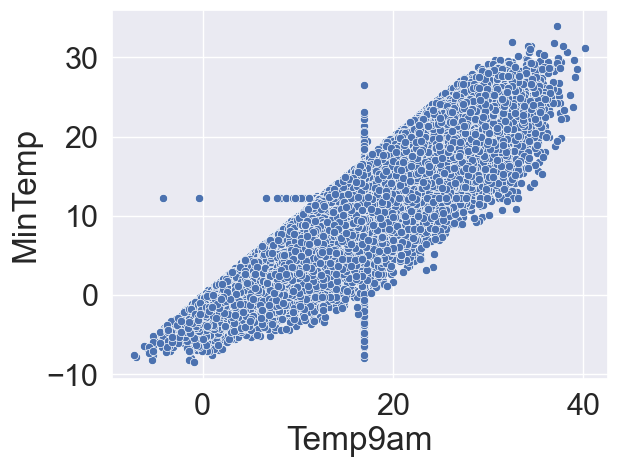

In [179]:
sns.scatterplot(x='Temp9am', y='MinTemp', data=X)

<Axes: xlabel='Temp3pm', ylabel='MaxTemp'>

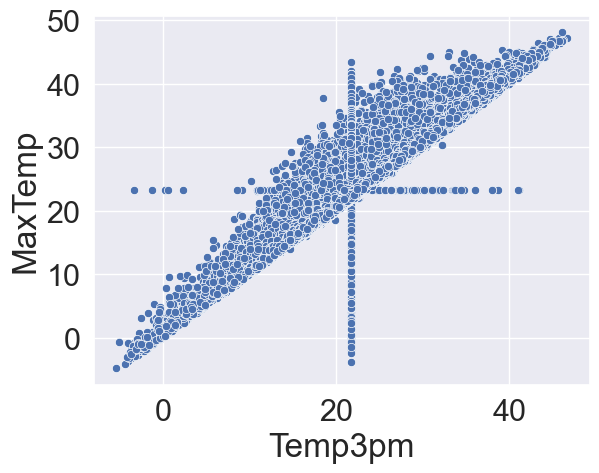

In [180]:
sns.scatterplot(x='Temp3pm', y='MaxTemp', data=X)

<Axes: xlabel='Pressure9am', ylabel='Pressure3pm'>

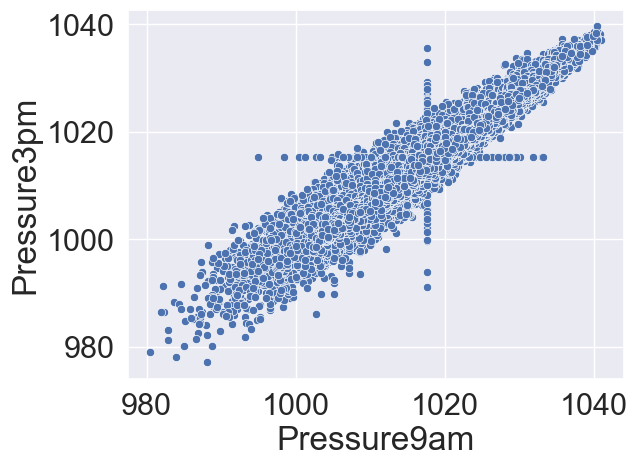

In [212]:
sns.scatterplot(x='Pressure9am', y='Pressure3pm', data=X)

<Axes: xlabel='Humidity9am', ylabel='Humidity3pm'>

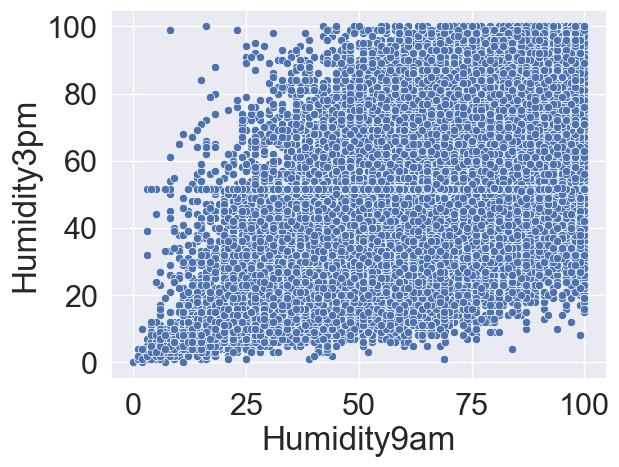

In [184]:
sns.scatterplot(x='Humidity9am', y='Humidity3pm', data=X)

<b>Present here your justification</b>

Because these independent features showed high linearity, it's better to drop these for better modeling results.

In [19]:
X.drop(['Temp9am', 'Temp3pm', 'Pressure9am','Humidity9am','Date'], axis=1, inplace=True)

## Task 4: Feature scaling & dataset split

Perform feature scaling (by using two different Scalers from the scikit-learn library) by scaling the numerical fearures in the dataset and then append the categorical features to the scaled numerical dataframe

In [20]:
num_cols = X.dtypes[X.dtypes != 'object'].index.to_list()
cat_cols = X.dtypes[X.dtypes == 'object'].index.to_list()

X_num = X[num_cols]
X_cat = X[cat_cols]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=num_cols)

In [21]:
X_cat

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,WSW,W,WSW,No
3,Albury,NE,SE,E,No
4,Albury,W,ENE,NW,No
...,...,...,...,...,...
145455,Uluru,E,SE,ENE,No
145456,Uluru,NNW,SE,N,No
145457,Uluru,N,SE,WNW,No
145458,Uluru,SE,SSE,N,No


In [22]:
for col in cat_cols:
    X_cat = pd.get_dummies(X_cat, columns = [col])


In [23]:
X_cat

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
145456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
145457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
145458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [24]:
X_scaled = pd.concat([X_num_scaled, X_cat], axis=1)

In [25]:
X_scaled

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.189447,-4.533631e-02,-0.210072,-2.809331e-16,-6.508050e-16,0.302234,0.672222,0.612323,-1.442965,-1.223882,...,False,False,False,False,False,False,True,False,True,False
1,-0.753101,2.650431e-01,-0.281650,-2.809331e-16,-6.508050e-16,0.302234,-1.133438,0.382874,-1.296417,-1.118839,...,False,False,False,False,False,False,False,True,True,False
2,0.110901,3.496920e-01,-0.281650,-2.809331e-16,-6.508050e-16,0.454694,0.559368,0.841771,-1.052171,-0.983784,...,False,False,False,False,False,False,False,True,True,False
3,-0.470337,6.741796e-01,-0.281650,-2.809331e-16,-6.508050e-16,-1.222364,-0.343462,-1.108541,-1.736061,-0.368534,...,False,False,False,False,False,False,False,False,True,False
4,0.833521,1.280830e+00,-0.162353,-2.809331e-16,-6.508050e-16,0.073544,-0.794877,0.153426,-0.905623,-1.388949,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.475720,2.520446e-02,-0.281650,-2.809331e-16,-6.508050e-16,-0.688755,-0.117754,-0.879093,-1.345267,0.756925,...,False,False,False,False,False,False,False,False,True,False
145456,-1.350047,2.932594e-01,-0.281650,-2.809331e-16,-6.508050e-16,-1.374824,-0.117754,-1.108541,-1.491815,0.576852,...,False,False,False,False,False,False,False,False,True,False
145457,-1.067283,5.189899e-01,-0.281650,-2.809331e-16,-6.508050e-16,-0.231375,-0.569169,-1.108541,-1.345267,0.231711,...,False,False,False,False,False,False,True,False,True,False
145458,-0.690264,5.330980e-01,-0.281650,-2.809331e-16,-6.508050e-16,-0.917445,-0.117754,-1.337990,-1.345267,0.186693,...,False,False,False,False,False,False,False,False,True,False


Justify your final selection and elaborate on the results

In [26]:
# Split the dataset into training, validation, and test sets.
# Place your code

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)

## Task 5: Binary Classification

As mentioned in the beggining you are requested by your Project Manager to implement and evaluate two different classification models. Thus, choose and train two classification algorithms.

In [27]:
# Apply your model and fit it in the train set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

lr = LogisticRegression(max_iter=500)
lr.fit(X_tr, y_tr)
lr_pred = lr.predict(X_val)

/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_tr, y_tr)
rf_pred = rf.predict(X_val)

/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [30]:
# Model Evaluation on Validation Set
# Evaluate each model on the validation set

conf = confusion_matrix(y_val, lr_pred)
print ("The accuracy of Logistic Regression is : ", round(accuracy_score(y_val, lr_pred)*100,2), "%")
print()
print("F1 score for logistic regression is :",round(f1_score(y_val, lr_pred)*100,2), "%")

The accuracy of Logistic Regression is :  84.59 %

F1 score for logistic regression is : 58.18 %


In [31]:
threshold = 0.5
rf_pred_binary = np.where(rf_pred >= threshold, 1, 0)

conf = confusion_matrix(y_val, rf_pred_binary)
print ("The accuracy of random forest Regression is : ", round(accuracy_score(y_val, rf_pred_binary)*100,2), "%")
print()
print("F1 score for random forest regression is :",round(f1_score(y_val, rf_pred_binary)*100,2), "%")

The accuracy of random forest Regression is :  85.28 %

F1 score for random forest regression is : 60.84 %


Compare the models based on the different evaluation metrics (e.g., accuracy, precision, F1-score) and fine-tune them. Perform a Hyperparameter tuning using Grid Search on the validation set for both the models and display the results

<b>Present here your justification</b>

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters grid for logistic regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # regularization parameter
    'max_iter': [100, 200, 300, 400, 500]  # maximum number of iterations
}

# Define hyperparameters grid for random forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # minimum number of samples required to split a node
}

# Initialize Logistic Regression and Random Forest classifiers
lr = LogisticRegression()
rf = RandomForestClassifier()

# Initialize GridSearchCV for logistic regression
lr_grid_search = GridSearchCV(lr, lr_param_grid, cv=3, scoring='accuracy')
# Fit the grid search to the data
lr_grid_search.fit(X_tr, y_tr)

# Initialize GridSearchCV for random forest
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=3, scoring='accuracy')
# Fit the grid search to the data
rf_grid_search.fit(X_tr, y_tr)

# Print best parameters and best scores for logistic regression
print("Best parameters for Logistic Regression:")
print(lr_grid_search.best_params_)
print("Best score for Logistic Regression:", lr_grid_search.best_score_)

# Print best parameters and best scores for random forest
print("\nBest parameters for Random Forest:")
print(rf_grid_search.best_params_)
print("Best score for Random Forest:", rf_grid_search.best_score_)


/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters for Logistic Regression:
{'C': 1, 'max_iter': 100}
Best score for Logistic Regression: 0.8469181561203117

Best parameters for Random Forest:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best score for Random Forest: 0.8538788659662845


#### Task 5.1: Feature importance analysis

Analyze and interpret the importance of features in predicting rainfall

In [33]:
# Place your code here
# Display the feature importances
best_rf = rf_grid_search.best_estimator_
importances_values = best_rf.feature_importances_
importances = pd.Series(importances_values, index=X_tr.columns)
importances.sort_values(ascending=False)

Humidity3pm              0.172939
Pressure3pm              0.070936
Sunshine                 0.059332
WindGustSpeed            0.057935
MaxTemp                  0.055752
                           ...   
Location_Nhil            0.001046
Location_Townsville      0.000928
Location_AliceSprings    0.000924
Location_Katherine       0.000712
Location_Uluru           0.000561
Length: 111, dtype: float64

#### Task 5.2 Final model evaluation on test set

In [40]:
# Evaluate each model on the test set
# Place your code here

# Fit the best logistic regression model
best_lr = lr_grid_search.best_estimator_
best_lr.fit(X_train, y_train)
pred1 = best_lr.predict(X_test)
accuracy1 = accuracy_score(y_test, pred1)
print(f'Logistic Regression accuracy : {round(accuracy1*100,2)}')

# Fit the best random forest model
best_rf = rf_grid_search.best_estimator_
best_rf.fit(X_train, y_train)
pred2 = best_rf.predict(X_test)
accuracy2 = accuracy_score(y_test, pred2)
print(f'Random Forest accuracy : {round(accuracy2*100,2)}')

/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

Logistic Regression accuracy : 84.86
Random Forest accuracy : 85.67


<b>Present here your justification for the final selected model</b>

I would finally select Random Forest model, because it showed 85.28% accuracy before hyperparameter tunning by using grid search method. And also after setting the hyperparameter as {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}, the accuracy increased to 85.67%. This results showed higher accuracy than Logistic regression in both ways. 

## Conclusion

1) Summarize the findings and provide insights based on the analysis.<br/>
2) Discuss the potential applications of the final selection model in real-world scenarios

<b>Present here your analysis</b>

### 1. Summarize the findings and provide insights based on the analysis.
For preprocessing, I analyzed how correlated between independent features (X) using heatmap. And I found out that MaxTemp & Temp3pm, MinTemp & Temp9am, Pressure3pm & Pressure9am, and Humidity3pm & Humidity9am show high correlation in the heatmap and higih linearity in the scatterplot. So I decided to drop one of these two features respectively and also 'Date' which is not related to predicting the probability of rain. 

The histograms of independent features show normal distribution, but the scale of each graphs are not equal. For better modeling, I used StandardScaler for numerical features and One-hot encoding for categorical features. 
	
I chose LogisticRegression and RandomForest as two different classification models, and divided data sets into  training, validation, and test sets. Before hyperparameter tunning, this two models showed 84.59%, and 85.28% accuracy respectivey. And after hyperparameter tunning, these values increased slightly to 84.86% and 85.67%.
	
According to feature importance analysis, I found out Humidity3pm affects the prediction of target 'RainTomorrow' the most. 

### 2. Discuss the potential applications of the final selection model in real-world scenarios
People can use this model to decide whether the restaurant owner will open the outside seats or not. They can reduce the cost for preparation in advance. 
Also, this model can be applied to the amusement park. Some attractions are not allowed to be operated in the rain because of safety issue. Employees can manage this by using this model. 